<a href="https://colab.research.google.com/github/RylieWeaver/Hyperparameter-Optimization/blob/main/DeepTTA_HPO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read / Prepare Data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving output_ga.csv to output_ga.csv


In [ ]:
print("Uploaded files:", uploaded.keys())

Uploaded files: dict_keys(['output_ga.csv'])


In [ ]:
import io
import pandas as pd

df_unclean = pd.read_csv(io.BytesIO(uploaded['output_ga.csv']))

In [ ]:
# Take out epochs
df_unclean = df_unclean.drop(columns=['epochs'])

In [ ]:
# Display the first few rows of the DataFrame
df_unclean.head()

,learning_rate,batch_size,dropout,val_loss
0,0.000480,512,0.495223,1.135039
1,0.000653,32,0.318324,8.124258
2,0.000017,32,0.327813,1.051028
3,0.000837,32,0.454921,8.053840
4,0.000851,512,0.324151,7.371890


In [ ]:
df_no_dupes = df_unclean.drop_duplicates()

In [ ]:
df_sorted_no_dupes = df_no_dupes.sort_values('val_loss')

In [ ]:
df_sorted_no_dupes[:10]

,learning_rate,batch_size,dropout,val_loss
198,0.000010,16,0.033466,0.965495
70,0.000059,64,0.050260,0.973119
158,0.000010,8,0.000000,0.975269
150,0.000042,64,0.050260,0.977714
241,0.000017,8,0.000000,0.981246
239,0.000059,64,0.028081,0.989675
151,0.000043,16,0.000400,0.994075
224,0.000017,32,0.139549,0.994739
196,0.000031,16,0.000000,0.997059
65,0.000020,8,0.000400,0.997772


5.46% Improvement from baseline of 1.02129 with default hyperparameters

2.61% Improvement compared to random search with equal number of evaluations

In [ ]:
import numpy as np

df = df_unclean.copy()

# Apply the log2 transformation to the "Batch Size" column
df['batch_size'] = np.log2(df['batch_size'])

# Display the updated DataFrame
df.head()

,learning_rate,batch_size,dropout,val_loss
0,0.000480,9.0,0.495223,1.135039
1,0.000653,5.0,0.318324,8.124258
2,0.000017,5.0,0.327813,1.051028
3,0.000837,5.0,0.454921,8.053840
4,0.000851,9.0,0.324151,7.371890


## Plots

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm

### 3D Plots

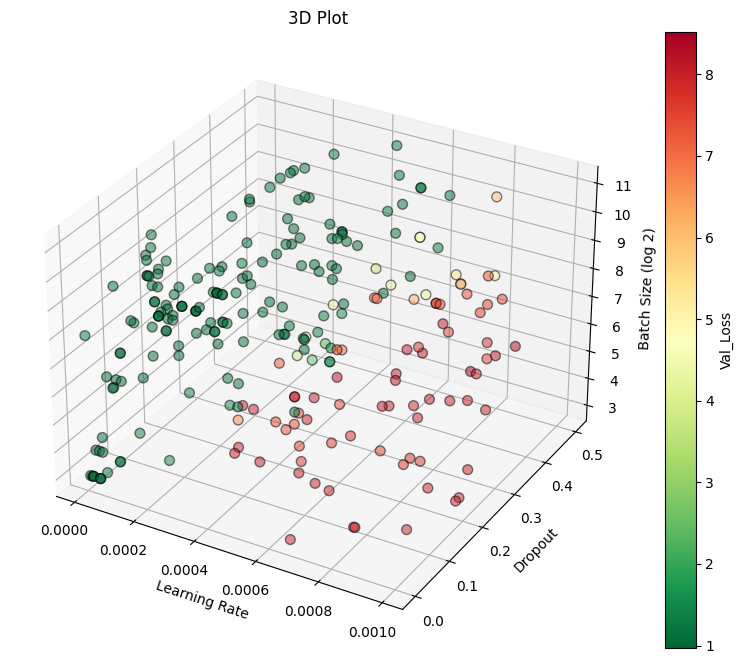

In [ ]:
# Create a colormap that maps val_loss to colors (red to green)
loss_trans = df['val_loss']**(1)
#loss_trans = np.log10(df['Val_Loss'])
norm = mcolors.Normalize(loss_trans.min(), loss_trans.max())
colormap = cm.ScalarMappable(norm=norm, cmap='RdYlGn_r')

# Create a new figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'Learning Rate', 'Dropout', and 'Batch Size' as the three axes
# Colors determined by 'Val_Loss'
ax.scatter(df['learning_rate'], df['dropout'], df['batch_size'],
           c=colormap.to_rgba(loss_trans),
           s=50, edgecolors='k', alpha=0.5)

# Adding labels
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Dropout')
ax.set_zlabel('Batch Size (log 2)')

# Adding colorbar
plt.title("3D Plot")
plt.colorbar(colormap, ax=ax, label='Val_Loss')

plt.show()

### 2D Subplots

<ipython-input-15-14c0d1e09135>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


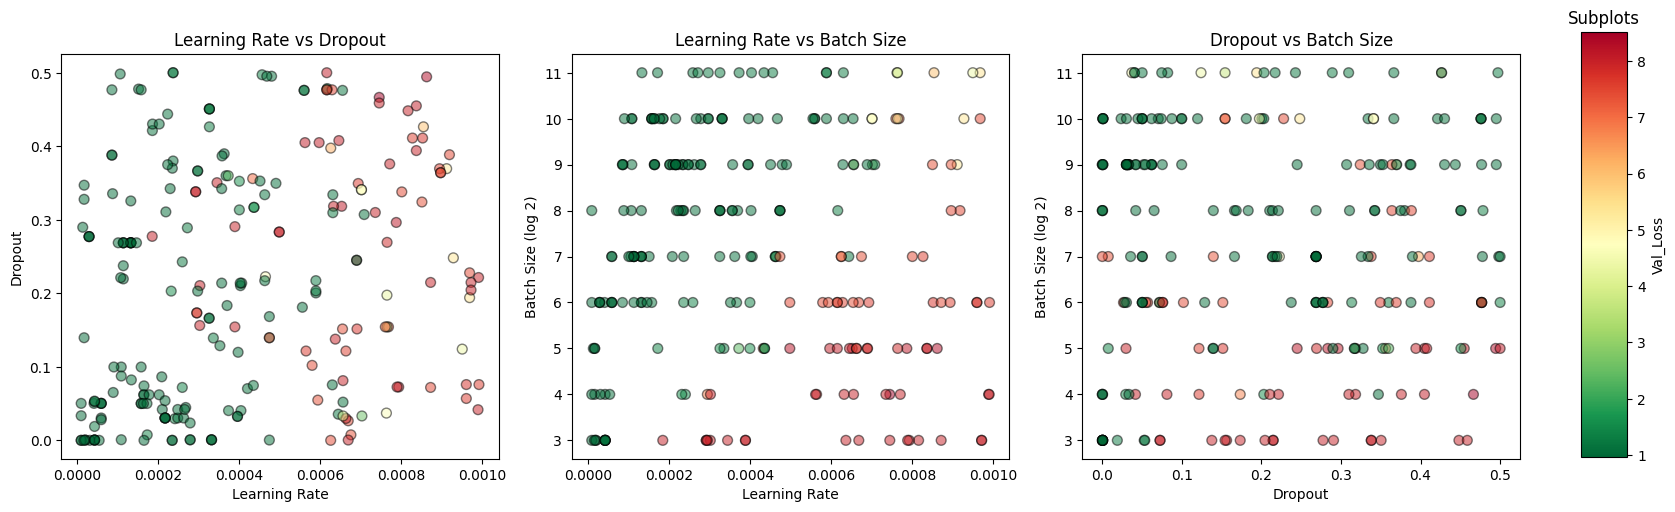

In [ ]:
# Create a colormap that maps the val_loss to colors (red to green)
loss_trans = df['val_loss']**(1)
#loss_trans = np.log10(df['Val_Loss'])
norm = mcolors.Normalize(loss_trans.min(), loss_trans.max())
colormap = cm.ScalarMappable(norm=norm, cmap='RdYlGn_r')

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15.4, 5))

# Subplot 1: 'Learning Rate' vs 'Dropout'
axes[0].scatter(df['learning_rate'], df['dropout'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Dropout')
axes[0].set_title('Learning Rate vs Dropout')

# Subplot 2: 'Learning Rate' vs 'Batch Size'
axes[1].scatter(df['learning_rate'], df['batch_size'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Batch Size (log 2)')
axes[1].set_title('Learning Rate vs Batch Size')

# Subplot 3: 'Dropout' vs 'Batch Size'
axes[2].scatter(df['dropout'], df['batch_size'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[2].set_xlabel('Dropout')
axes[2].set_ylabel('Batch Size (log 2)')
axes[2].set_title('Dropout vs Batch Size')

# Create a new axes for the colorbar
cbar_ax = fig.add_axes([1.03, 0.12, 0.03, 0.85]) # [left, bottom, width, height]

# Add the colorbar to the new axes
fig.colorbar(colormap, cax=cbar_ax, label='Val_Loss')

plt.title("Subplots")
plt.tight_layout()
plt.show()

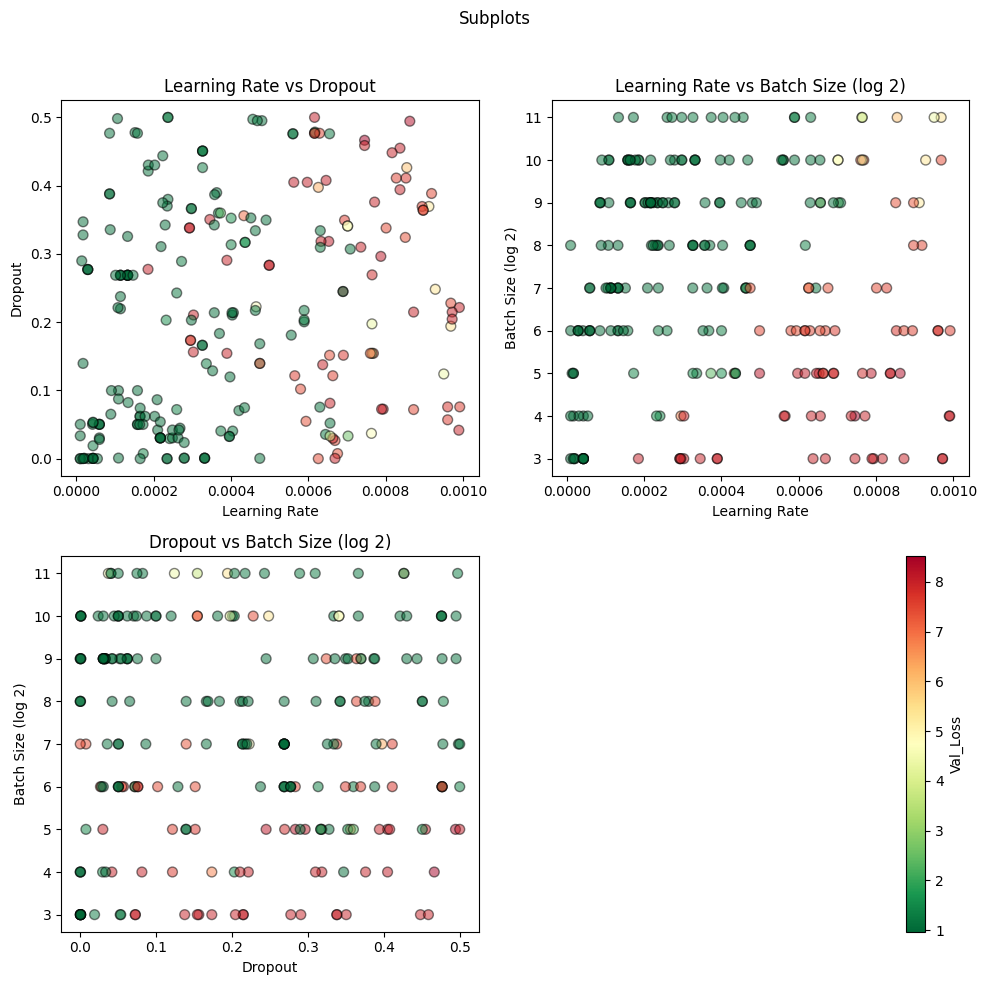

In [ ]:
# Create a colormap that maps the val_loss to colors (red to green)
loss_trans = df['val_loss']**(1)
#loss_trans = np.log10(df['Val_Loss'])
norm = mcolors.Normalize(loss_trans.min(), loss_trans.max())
colormap = cm.ScalarMappable(norm=norm, cmap='RdYlGn_r')

# Create a figure with 4 subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Subplot 1: 'Learning Rate' vs 'Dropout'
axes[0, 0].scatter(df['learning_rate'], df['dropout'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[0, 0].set_xlabel('Learning Rate')
axes[0, 0].set_ylabel('Dropout')
axes[0, 0].set_title('Learning Rate vs Dropout')

# Subplot 2: 'Learning Rate' vs 'Batch Size'
axes[0, 1].scatter(df['learning_rate'], df['batch_size'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[0, 1].set_xlabel('Learning Rate')
axes[0, 1].set_ylabel('Batch Size (log 2)')
axes[0, 1].set_title('Learning Rate vs Batch Size (log 2)')

# Subplot 3: 'Dropout' vs 'Batch Size'
axes[1, 0].scatter(df['dropout'], df['batch_size'], c=colormap.to_rgba(loss_trans), s=50, edgecolors='k', alpha=0.5)
axes[1, 0].set_xlabel('Dropout')
axes[1, 0].set_ylabel('Batch Size (log 2)')
axes[1, 0].set_title('Dropout vs Batch Size (log 2)')

# Subplot 4: Colorbar
fig.colorbar(colormap, ax=axes[1, 1], orientation='vertical', label='Val_Loss')
axes[1, 1].set_axis_off() # Hide the unused axis

plt.suptitle("Subplots")
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust to fit the main title
plt.show()


## Statistical Analysis

Note: This analysis assumes linearity with hyperparameters

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the X (features) and y (target) variables
X = df[['learning_rate', 'batch_size', 'dropout']]
y = df['val_loss']

# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               val_loss   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     224.0
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           2.13e-69
Time:                        16:43:10   Log-Likelihood:                -454.42
No. Observations:                 245   AIC:                             916.8
Df Residuals:                     241   BIC:                             930.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9731      0.352     11.300